In [52]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
from math import factorial

In [53]:
# plt.style.use('ggplot')
plt.style.use("seaborn-v0_8-darkgrid")

# Función Esfera
* $f(x)=\sum_{i=1}^nx_i^2$

# Función Quadric
* $f(x)=\sum_{i=1}^n(\sum_{j=1}^ix_j)^2$

# Función Rosenbrock
* $f(x)=\sum_{i=1}^{n}100(y_i-x_i^2)^2+(1-x_i)^2$

# Función Rastrigin
* $f(x)=10+\sum_{i=1}^n(x_i^2-10\cos(2\pi x_i))$

* https://www.zubairkhalid.org/ee563_2020.html
* https://www.youtube.com/playlist?list=PLAZUHhADQH_XFrj0YRB_7N0Jg32RADKIZ
* https://machinelearningmastery.com/2d-test-functions-for-function-optimization/

In [54]:
def Esfera_test(x: np.array) -> np.array:
    """Función esfera de evalución unimodal"""
    result = x ** 2
    return result


def Quadric_test(x: np.array) -> np.array:
    """Función de evalución unimodal"""
    n = len(x)
    result = np.empty(n)
    for i in range(n + 1):
        cont = 0
        for j in range(i):
            cont += x[j]
        cont **= 2
        result[i - 1] = cont
    return result


def Rosenbrock_test(X: np.array) -> np.array:
    """Función de evalución multimodal"""
    x, y = X
    return 100 * (y - x ** 2) ** 2 + (1 - x) ** 2


def Rastrigin_test(x: np.array) -> np.array:
    """Función de evalución multimodal"""
    result = 10 + x ** 2 - (10 * np.cos(2 * np.pi * x))
    result = np.array(result)
    return result

In [55]:
ent = np.array([1, 2, 3, 4, 5])
print(f"Entrada: {ent}")
print(f"Esfera: {Esfera_test(ent)}")
print(f"Quadric: {Quadric_test(ent)}")
print(f"Rosenbroc: {Rosenbrock_test([ent, ent])}")
print(f"Rastrigin: {Rastrigin_test(ent)}")

Entrada: [1 2 3 4 5]
Esfera: [ 1  4  9 16 25]
Quadric: [  1.   9.  36. 100. 225.]
Rosenbroc: [    0   401  3604 14409 40016]
Rastrigin: [ 1.  4.  9. 16. 25.]


In [56]:
# funciones de prueba 3D

x = np.linspace(-5.12, 5.12, 300)
y = np.linspace(-5.12, 5.12, 300)
X, Y = np.meshgrid(x, y, sparse=True)

print(np.shape(X))
print(np.shape(Y))

(1, 300)
(300, 1)


In [57]:
esfera = Esfera_test(X) + Esfera_test(Y)
Qx, Qy = np.meshgrid(Quadric_test(x), Quadric_test(y))
quadric = Qx + Qy
qs = np.sum(np.meshgrid(Quadric_test(x), Quadric_test(y)))
rosenbrock = Rosenbrock_test([X, Y])
rastrigin = Rastrigin_test(X) + Rastrigin_test(Y)

In [58]:
print(np.shape(esfera))
print(np.shape(quadric))
print(np.shape(rosenbrock))
print(np.shape(rastrigin))

(300, 300)
(300, 300)
(300, 300)
(300, 300)


In [59]:
funcion = rastrigin
funcion = funcion / max(funcion[:, 0])
title = "$Función$ $de$ $prueba$ $Rastrigin$"
cmp = cm.nipy_spectral  # cm.terrain

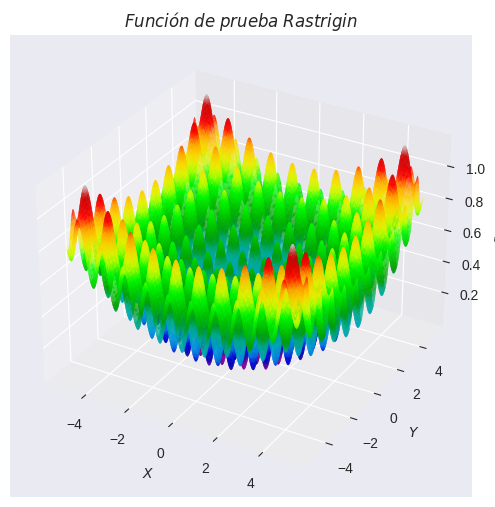

In [60]:
ax = plt.figure(figsize=(10, 6)).add_subplot(projection="3d")
ax.plot_surface(
    X, Y, funcion, rstride=1, cstride=1, cmap=cmp, linewidth=0.08, antialiased=True
)
ax.set_title(title)
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_zlabel("$f(x,y)$")
ax.grid(True)
plt.show()

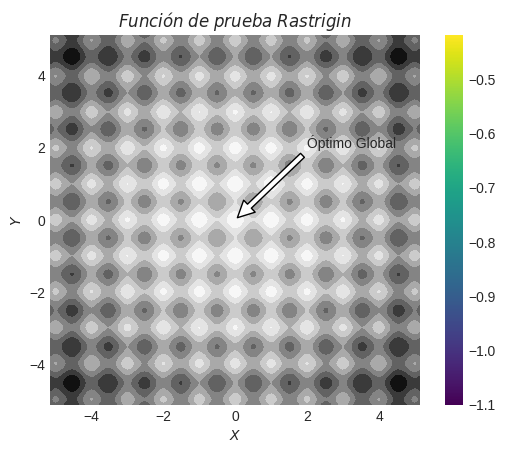

In [61]:
# Funciones de prueba 2D

fig, ax = plt.subplots()
ax.contourf(x, y, funcion, 10)
ax.annotate(
    "Óptimo Global",
    xy=(0, 0),
    xytext=(2, 2),
    arrowprops=dict(facecolor="white", shrink=0.03),
)
ax.axis("scaled")
ax.set_title(title)
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
cmap = cm.viridis
norm = mpl.colors.Normalize(vmin=-min(funcion[:, 0]), vmax=-max(funcion[:, 0]))
fig.colorbar(cm.ScalarMappable(norm, cmap), ax=ax)
ax.grid(True)
plt.show()

In [62]:
class Graficar:
    def __init__(self, nombre: str, funcion: list, x: list, y: list):
        self.cmp = cm.nipy_spectral
        self.nombre = nombre
        self.funcion = funcion
        self.x = x
        self.y = y

    def grafica3d(self):
        """Grafica 3D la función de prueba"""

        X, Y = np.meshgrid(self.x, self.y, sparse=True)
        ax = plt.figure(figsize=(10, 6)).add_subplot(projection="3d")
        ax.plot_surface(
            X,
            Y,
            self.funcion,
            rstride=1,
            cstride=1,
            cmap=self.cmp,
            linewidth=0.08,
            antialiased=True,
        )
        ax.set_title(f"$Función$ ${self.nombre}$")
        ax.set_xlabel("$X$")
        ax.set_ylabel("$Y$")
        ax.set_zlabel("$f(x,y)$")
        ax.grid(True)
        plt.show()

    def grafica2d(self, intesisdad=10):
        """Mapa de contorno la función de prueba"""

        fig, ax = plt.subplots()
        ax.contourf(self.x, self.y, self.funcion, intesisdad)
        ax.axis("scaled")
        ax.set_title(f"$Función$ ${self.nombre}$")
        ax.set_xlabel("$X$")
        ax.set_ylabel("$Y$")
        norm = mpl.colors.Normalize(
            vmin=-min(self.funcion[:, 0]), vmax=-max(self.funcion[:, 0])
        )
        fig.colorbar(cm.ScalarMappable(norm, self.cmp), ax=ax)
        ax.grid(True)
        plt.show()

In [63]:
grafica = Graficar("Esfera", rastrigin, x, y)

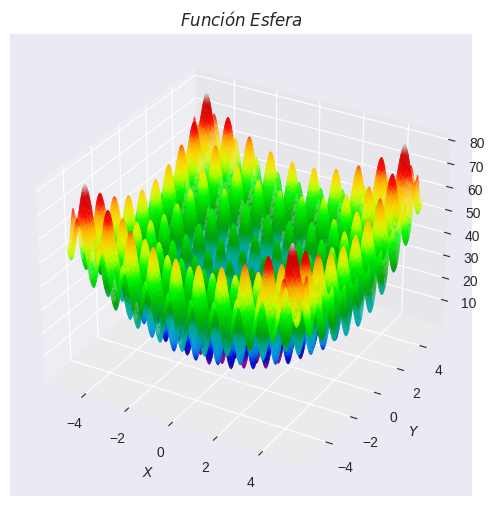

In [64]:
grafica.grafica3d()

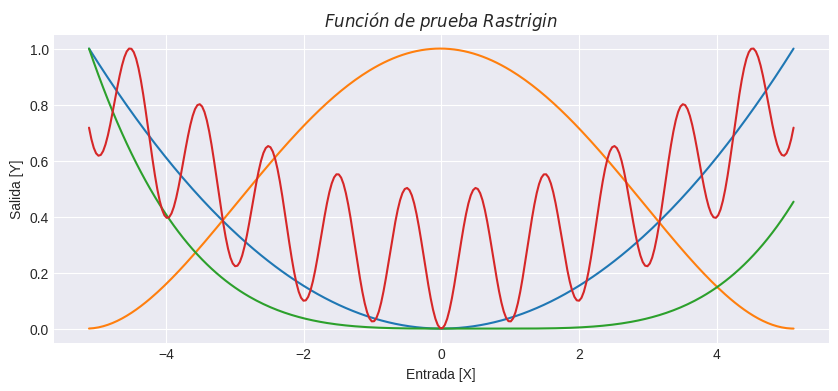

In [65]:
# Funciones de prueba

x1 = np.linspace(-5.12, 5.12, 300)
y1 = Esfera_test(x1)
y2 = Quadric_test(x1)
y3 = Rosenbrock_test([x1, x1])
y4 = Rastrigin_test(x1)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x1, y1 / max(y1))
ax.plot(x1, y2 / max(y2))
ax.plot(x1, y3 / max(y3))
ax.plot(x1, y4 / max(y4))
ax.set_title(title)
ax.set_ylabel("Salida [Y]")
ax.set_xlabel("Entrada [X]")
ax.grid(True)
plt.show()

In [66]:
x = np.linspace(0, 50, 25)

funciones = {
    "$n$": (0.8 * x[:], "r-"),
    "$n²$": (2 * x ** 2.5 / 100, "g-."),
    "$n$ $log(n)$": (0.9 * x[1:] * np.log10(x[1:]), "b-^"),
    "$log(n)$": (10 * np.log10(x[1:]), "y-o"),
}

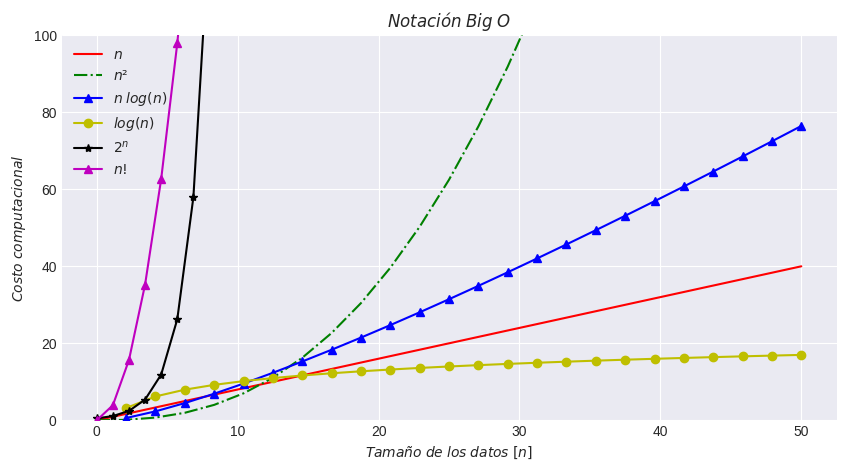

In [67]:
dt = np.linspace(0, 8, 8)

fig, ax = plt.subplots(figsize=(10, 5))

for label, funtion in funciones.items():
    f = funtion[0]
    fm = np.max(f)
    c = funtion[1]
    try:
        ax.plot(x, f, c, label=label)
    except:
        ax.plot(x[1:], f, c, label=label)

ax.plot(dt, 2 ** dt * 0.5, "k-*", label="$2^n$")
ax.plot(dt, 3 * dt ** 2, "m-^", label="$n!$")
ax.set_ylim([0, 100])
ax.set_title("$Notación$ $Big$ $O$")
ax.set_ylabel("$Costo$ $computacional$")
ax.set_xlabel("$Tamaño$ $de$ $los$ $datos$ $[n]$")
ax.legend()
ax.grid(True)
plt.show()